In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

We begin by reading in the dataset with Trump approval ratings from the website [FiveThirtyEight](https://fivethirtyeight.com). The dataset comes as a CSV file and can be read in with `pd.read_csv`.  The `parse_dates` argument indicates that those columns are dates, and that Pandas should parse them as such.

In [3]:
url = "https://projects.fivethirtyeight.com/trump-approval-data/approval_polllist.csv"
df = pd.read_csv(url, parse_dates=[2, 3, 4])

Let's print some statistics about our dataset, and some representative quantities to make sure that parsing went alright (this is often _not_ the case, in which case you need to go back and tweak the parameters for `pd.read_csv`).

In [4]:
df.head()

,president,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,...,disapprove,adjusted_approve,adjusted_disapprove,multiversions,tracking,url,poll_id,question_id,createddate,timestamp
0,Donald Trump,All polls,2017-11-21,2017-01-20,2017-01-22,Morning Consult,NaN,1992,rv,0.798422,...,37.0,42.21507,40.12803,NaN,NaN,http://www.politico.com/story/2017/01/poll-vot...,49249,77261,1/23/2017,13:11:16 21 Nov 2017
1,Donald Trump,All polls,2017-11-21,2017-01-20,2017-01-22,Gallup,B-,1500,a,0.229544,...,45.0,46.21328,43.19894,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49253,77265,1/23/2017,13:11:16 21 Nov 2017
2,Donald Trump,All polls,2017-11-21,2017-01-20,2017-01-24,Ipsos,A-,1632,a,0.287416,...,45.2,42.13569,44.41069,NaN,T,http://polling.reuters.com/#poll/CP3_2/,49426,77599,3/1/2017,13:11:16 21 Nov 2017
3,Donald Trump,All polls,2017-11-21,2017-01-21,2017-01-23,Gallup,B-,1500,a,0.211740,...,46.0,46.21328,44.19894,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49262,77274,1/24/2017,13:11:16 21 Nov 2017
4,Donald Trump,All polls,2017-11-21,2017-01-21,2017-01-25,Ipsos,A-,1651,a,0.272001,...,45.8,42.33569,45.01069,NaN,T,http://polling.reuters.com/#poll/CP3_2/,49425,77598,3/1/2017,13:11:16 21 Nov 2017


In [5]:
df.describe()

,samplesize,weight,influence,approve,disapprove,adjusted_approve,adjusted_disapprove,poll_id,question_id
count,2676.000000,2676.000000,2676.000000,2676.000000,2676.000000,2676.000000,2676.000000,2676.000000,2676.000000
mean,2003.757848,0.418671,0.015375,41.161936,54.220904,40.506663,53.505067,49891.349776,78392.992152
std,2439.026525,0.475495,0.098497,4.256372,4.099231,3.517417,3.762514,352.750785,638.557942
min,121.000000,0.020602,0.000000,32.000000,35.000000,33.125050,37.419640,49232.000000,77244.000000
25%,1472.000000,0.136530,0.000000,38.000000,52.000000,37.843635,51.313367,49597.000000,77865.000000
50%,1500.000000,0.210729,0.000000,41.000000,55.000000,39.868720,54.198940,49900.000000,78409.500000
75%,1660.000000,0.496404,0.000000,44.000000,57.000000,42.651160,56.198940,50195.250000,78877.250000
max,20020.000000,3.141890,1.704441,59.000000,68.000000,55.651160,63.436860,50494.000000,79684.000000


In [6]:
df.dtypes

president                      object
subgroup                       object
modeldate              datetime64[ns]
startdate              datetime64[ns]
enddate                datetime64[ns]
pollster                       object
grade                          object
samplesize                      int64
population                     object
weight                        float64
influence                     float64
approve                       float64
disapprove                    float64
adjusted_approve              float64
adjusted_disapprove           float64
multiversions                  object
tracking                       object
url                            object
poll_id                         int64
question_id                     int64
createddate                    object
timestamp                      object
dtype: object

The dataset has a whole bunch of quantities relating to polls taken by various organizations to measure Trump's approval ratings. Here we only care about the poll start date, the pollster, the sample size, and the approval and disapproval ratings, so let's lift out those columns. Let's also set the poll start date to be the index in our dataframe.

In [7]:
selected_df = df[['startdate', 'pollster', 'samplesize', 'approve', 'disapprove']]
selected_df.set_index('startdate', inplace=True)

In [8]:
selected_df.head()

,pollster,samplesize,approve,disapprove
startdate,,,,
2017-01-20,Morning Consult,1992,46.0,37.0
2017-01-20,Gallup,1500,45.0,45.0
2017-01-20,Ipsos,1632,42.1,45.2
2017-01-21,Gallup,1500,45.0,46.0
2017-01-21,Ipsos,1651,42.3,45.8


Who are the pollsters whose results are used to make up this dataset?

In [9]:
selected_df['pollster'].unique()

array(['Morning Consult', 'Gallup', 'Ipsos',
       'Rasmussen Reports/Pulse Opinion Research', 'Quinnipiac University',
       'Public Policy Polling', 'YouGov', 'SurveyMonkey', 'IBD/TIPP',
       'CNN/Opinion Research Corp.', 'CBS News',
       'Zogby Interactive/JZ Analytics', 'McLaughlin & Associates',
       'Emerson College', 'Pew Research Center', 'Harris Interactive',
       'Fox News', 'Marist College', 'American Research Group',
       'NBC News/Wall Street Journal', 'Suffolk University',
       'Monmouth University', 'Garin-Hart-Yang / Global Strategy Group',
       'Saint Leo University', 'Kaiser Family Foundation', 'icitizen',
       'National Opinion Research Center', 'ABC News/Washington Post',
       'Gravis Marketing', 'Selzer & Company', 'SurveyUSA', 'CNN/SSRS',
       'Lake/Tarrance', 'Opinion Savvy', 'Lucid'], dtype=object)

How many polls are there?

In [10]:
len(selected_df)

2676

How many polls are there with at least 1500 participants?

In [11]:
len(selected_df[selected_df.samplesize >= 1500])

1994

How many polls are there with at least 1500 participants, and conducted by Gallup?

In [12]:
len(selected_df[(selected_df.samplesize >= 1500) & (selected_df.pollster == 'Gallup')])

600

Let's take only the latter (polls at least 1500 respondents, conducted by Gallup) and make a plot of approval and disapproval ratings.

In [13]:
# Note: I'm reusing the name of the dataframe here.
selected_df = selected_df[(selected_df.samplesize >= 1500) & (selected_df.pollster == 'Gallup')]

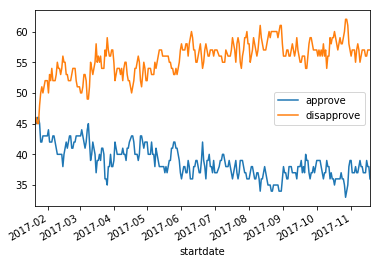

In [14]:
selected_df[['approve', 'disapprove']].plot()

Let's aggregate the data month by month to get a nice table of monthly approval ratings.

In [15]:
approval_df = selected_df[['approve', 'disapprove']]
approval_df.resample('M').mean()


,approve,disapprove
startdate,,
2017-01-31,43.833333,48.916667
2017-02-28,41.571429,53.035714
2017-03-31,40.193548,54.096774
2017-04-30,40.896552,53.310345
2017-05-31,39.483871,54.741935
2017-06-30,37.933333,56.933333
2017-07-31,37.827586,56.827586
2017-08-31,35.741935,58.580645
2017-09-30,37.500000,56.600000


Let's take a 10-day rolling mean of this data to get a smoother version of the approval ratings curves. Note that the result of `.rolling().mean()` will have 9 initial rows that are all NaN, as there aren't enough observations yet to produce an average yet, so let's drop those rows. Last, let's rename the columns to something more appropriate.

In [16]:
smoothed_df = approval_df.rolling(window=10).mean()
smoothed_df.dropna(inplace=True)

smoothed_df.rename(columns={
    'approve': 'approve (10-day average)', 'disapprove': 'disapprove (10-day average)'
}, inplace=True)

In [17]:
smoothed_df.head()

,approve (10-day average),disapprove (10-day average)
startdate,,
2017-01-29,44.0,48.3
2017-01-30,43.8,49.0
2017-01-31,43.6,49.6
2017-02-01,43.4,50.1
2017-02-02,43.0,50.9


In [18]:
len(smoothed_df)

591

Finally, let's make a plot of both the original and the smoothed data. It is possible to achieve this by making a plot of one dataset first, and then adding the other dataset to the plot. Here I first join the two datasets together, and then plot the result in one go. This wouldn't be quite recommended for large datasets (as we're basically creating a copy of all the data), but it serves as an illustration here of how Pandas is able to automatically join dataframes on datetime indices.

In [19]:
joined_df = pd.merge(approval_df, smoothed_df, how='outer', left_index=True, right_index=True)

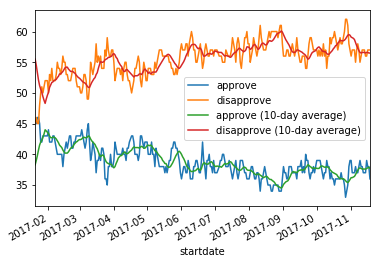

In [20]:
joined_df.plot()

You can see that there is a bit of lag in the smoothed curve compared to the raw data. This is due to our mean filter. If you wish, you can explore the arguments of `.rolling()` a bit more in detail to produce other aggregates that perhaps follow the trend a little closer.